In [11]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [12]:

pip install seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [16]:
# Load Dataset
df = pd.read_csv('UCI_Credit_Card.csv')

In [17]:
# Q-Learning Parameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01
num_episodes = 1000


In [18]:
# Prepare Data
features = ['LIMIT_BAL', 'AGE', 'EDUCATION', 'BILL_AMT1', 'PAY_AMT1']
X = df[features]
y = df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Initialize Q-table
num_states = len(X_train)
num_actions = 2  # Approve (0) or Deny (1)
Q_table = np.zeros((num_states, num_actions))

In [21]:
# Training Loop
for episode in range(num_episodes):
    state = np.random.randint(0, len(X_train))
    done = False

    while not done:
        # Choose action (exploration vs exploitation)
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)
        else:
            action = np.argmax(Q_table[state])

        # Simulate environment
        reward = 1 if (action == 0 and y_train.iloc[state] == 0) else -1
        next_state = (state + 1) % len(X_train)

        # Q-learning update
        Q_table[state, action] += learning_rate * (reward + discount_factor * np.max(Q_table[next_state]) - Q_table[state, action])
        state = next_state
        done = True

    # Epsilon decay
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

In [23]:
# Evaluate Policy
correct = 0
for i in range(len(X_test)):
    state = i % len(X_train)
    action = np.argmax(Q_table[state])
    if (action == 0 and y_test.iloc[i] == 0) or (action == 1 and y_test.iloc[i] == 1):
        correct += 1

accuracy = correct / len(X_test)
print(f'Q-Learning Model Accuracy: {accuracy:.2f}')

Q-Learning Model Accuracy: 0.77


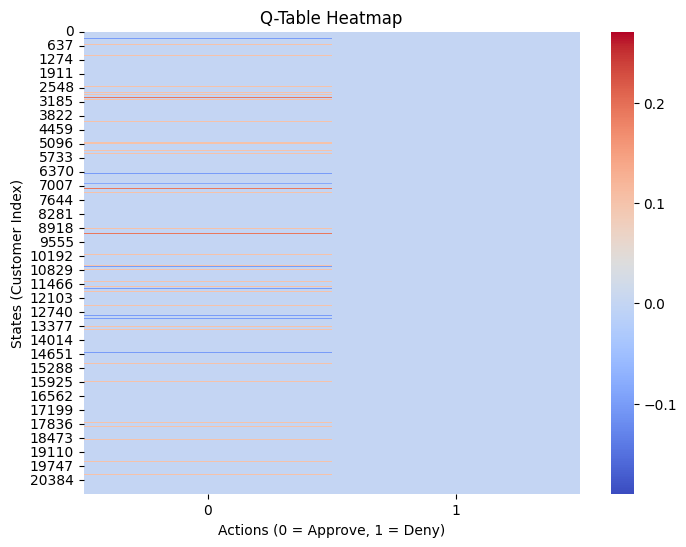

In [25]:
# Visualize Q-Table
plt.figure(figsize=(8, 6))
sns.heatmap(Q_table, cmap='coolwarm')
plt.title('Q-Table Heatmap')
plt.xlabel('Actions (0 = Approve, 1 = Deny)')
plt.ylabel('States (Customer Index)')
plt.show()